In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.impute import SimpleImputer, KNNImputer

sns.set(style="whitegrid")


Load California Housing Dataset

In [2]:
housing = fetch_california_housing(as_frame=True)
df = housing.frame  # Features + target 'MedHouseVal'

# Introduce missing values artificially (10% missing)
np.random.seed(42)
mask = np.random.rand(*df.shape) < 0.1
df_missing = df.mask(mask)

print("Dataset with Missing Values:")
print(df_missing.head())
print("\nMissing values per column:")
print(df_missing.isnull().sum())

Dataset with Missing Values:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556       NaN   
1  8.3014       NaN  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0       NaN   1.073059       558.0       NaN     37.85   
4  3.8462       NaN  6.281853   1.081081       565.0  2.181467       NaN   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  

Missing values per column:
MedInc         2052
HouseAge       2092
AveRooms       2010
AveBedrms      2105
Population     2089
AveOccup       2075
Latitude       2055
Longitude      2079
MedHouseVal    2074
dtype: int64


Split Data (Optional: for demonstration)

In [3]:
X_missing = df_missing[df_missing.isnull().any(axis=1)]
X_complete = df_missing.dropna()

Imputation with SimpleImputer

In [4]:
simple_imputer = SimpleImputer(strategy='median')
simple_imputed_data = simple_imputer.fit_transform(df_missing)
df_simple_imputed = pd.DataFrame(simple_imputed_data, columns=df_missing.columns)
df_simple_imputed.isnull().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

Imputation with KNNImputer

In [5]:
knn_imputer = KNNImputer(n_neighbors=5)
knn_imputed_data = knn_imputer.fit_transform(df_missing)
df_knn_imputed = pd.DataFrame(knn_imputed_data, columns=df_missing.columns)
df_knn_imputed.isnull().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

Visual Comparison: Distribution of a Feature

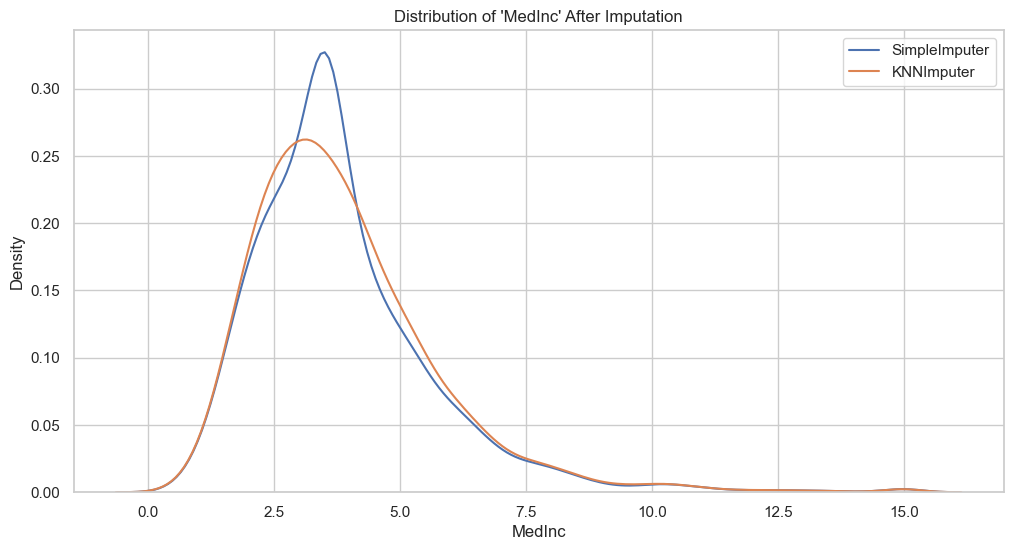

In [6]:
feature_to_compare = 'MedInc'  # median income
plt.figure(figsize=(12,6))
sns.kdeplot(df_simple_imputed[feature_to_compare], label='SimpleImputer', bw_adjust=1.5)
sns.kdeplot(df_knn_imputed[feature_to_compare], label='KNNImputer', bw_adjust=1.5)
plt.title(f"Distribution of '{feature_to_compare}' After Imputation")
plt.xlabel(feature_to_compare)
plt.ylabel("Density")
plt.legend()
plt.show()

 Compare Multiple Features (Optional)

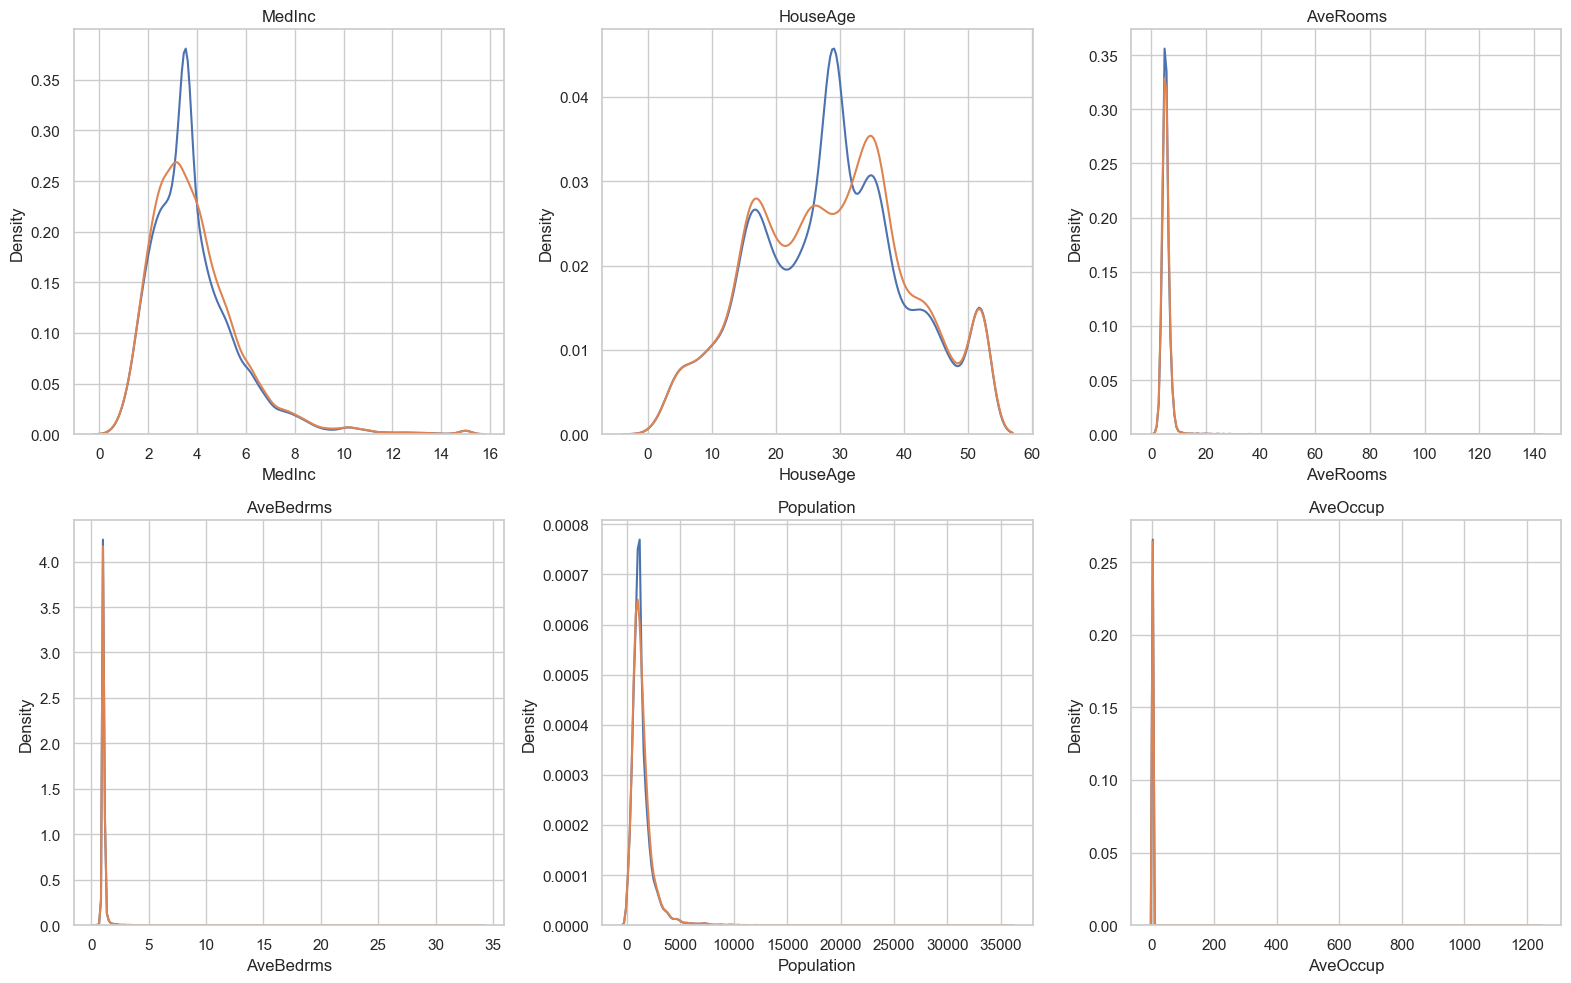

In [7]:
plt.figure(figsize=(16,10))
for i, feature in enumerate(df_missing.columns[:6]):  # first 6 features
    plt.subplot(2, 3, i+1)
    sns.kdeplot(df_simple_imputed[feature], label='SimpleImputer')
    sns.kdeplot(df_knn_imputed[feature], label='KNNImputer')
    plt.title(feature)
plt.tight_layout()
plt.show()

Final Check for Missing Values

In [8]:
print("After SimpleImputer:")
print(df_simple_imputed.isnull().sum())
print("\nAfter KNNImputer:")
print(df_knn_imputed.isnull().sum())

After SimpleImputer:
MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

After KNNImputer:
MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64
